In [5]:
import pandas as pd
import os

In [6]:
os.chdir("/mnt/c/Users/diego/OneDrive/Documentos/Data science projects/nlp 2/petsentiment_analysis")

In [7]:
data = pd.read_parquet("data/processed/train_data.parquet")
data.head()

,rating,text,asin,user_id,timestamp,Sentiment_target,word_count,processed_text
0,2.0,When I bought this I thought it would be effec...,B075N83693,AFASI57RME5JYIZMK2DOSMXVNFCA,2023-01-04 18:24:55.647000+00:00,0,96,buy think effective cut dog nail hate paw touc...
1,4.0,Says it holds 35 lbs but my 31 lb bag of food ...,B002Q7SZ2A,AEIHJFJYIR4GRY6UZK65LJU2NUVA,2023-03-15 03:19:27.473000+00:00,1,15,say hold lbs bag food not fit
2,2.0,I was hopeful that this would solve the trick ...,B07KRGVBCD,AEYB5YOWHB7V72J3EG4IF6LVZL4A,2023-01-25 17:50:59.419000+00:00,0,42,hopeful solve trick plastic get chew dog plast...
3,5.0,"Had to have this, even before I have the kitty...",B0BKL1V8L9,AFOZLZHEHJQDFX5XAFD7A4JWNIWA,2023-02-25 22:43:19.764000+00:00,1,23,kitty cute extremely pleased quality need
4,5.0,Perfect for my elderly cat who has an occasion...,B09QTTYLD5,AHXPT5Q4HABHQ7P24Y7SRJISFJKQ,2023-06-25 00:02:14.844000+00:00,1,34,perfect elderly cat occasional accident not mi...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176766 entries, 0 to 176765
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   rating            176766 non-null  float32            
 1   text              176766 non-null  string             
 2   asin              176766 non-null  string             
 3   user_id           176766 non-null  string             
 4   timestamp         176766 non-null  datetime64[ns, UTC]
 5   Sentiment_target  176766 non-null  int8               
 6   word_count        176766 non-null  int64              
 7   processed_text    176766 non-null  object             
dtypes: datetime64[ns, UTC](1), float32(1), int64(1), int8(1), object(1), string(3)
memory usage: 8.9+ MB


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar los archivos de entrenamiento y prueba
train_df = pd.read_parquet("data/processed/train_data.parquet")  # Ajusta la ruta a tu archivo de entrenamiento
test_df = pd.read_parquet("data/processed/test_data.parquet")      # Ajusta la ruta a tu archivo de prueba

# Dividir en características y etiquetas
X_train = train_df['processed_text']  # Texto procesado
y_train = train_df['Sentiment_target']  # Etiquetas de sentimiento

X_test = test_df['processed_text']      # Texto procesado de prueba
y_test = test_df['Sentiment_target']     # Etiquetas de sentimiento de prueba

# Vectorizar el texto utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features según sea necesario
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenar modelo de Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predecir con el modelo de Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluar el modelo de Naive Bayes
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Entrenar modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train)

# Predecir con el modelo de XGBoost
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluar el modelo de XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



Naive Bayes:
Accuracy: 0.8164766042175763
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     22666
           1       0.81      0.81      0.81     21530

    accuracy                           0.82     44196
   macro avg       0.82      0.82      0.82     44196
weighted avg       0.82      0.82      0.82     44196



/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:51:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.8217033215675627
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     22666
           1       0.84      0.79      0.81     21530

    accuracy                           0.82     44196
   macro avg       0.82      0.82      0.82     44196
weighted avg       0.82      0.82      0.82     44196



NameError: name 'np' is not defined

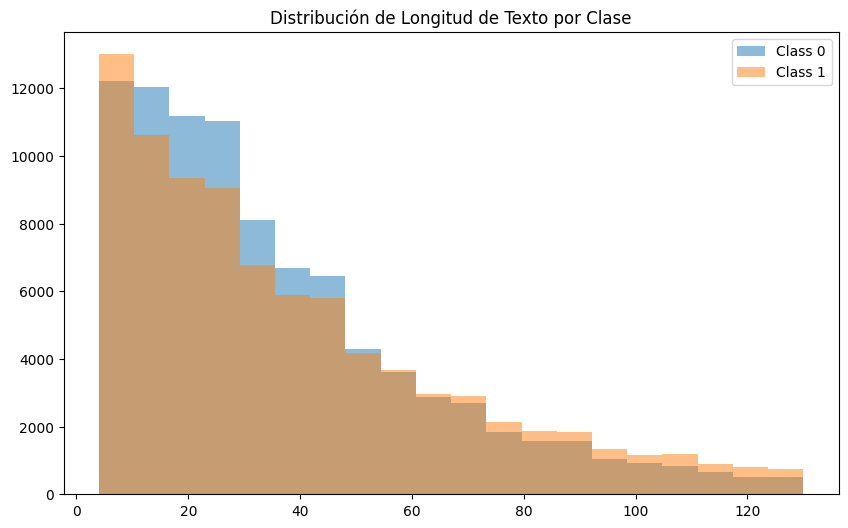

In [10]:
# Código de diagnóstico que usaríamos
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sample(sample_path):
    df = data
    # 1. Distribución de longitud vs sentimiento
    plt.figure(figsize=(10,6))
    for label in [0, 1]:
        subset = df[df['Sentiment_target'] == label]
        plt.hist(subset['word_count'], bins=20, alpha=0.5, label=f'Class {label}')
    plt.title('Distribución de Longitud de Texto por Clase')
    plt.legend()
    
    # 2. Términos más discriminativos
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(max_features=50)
    X = tfidf.fit_transform(df['processed_text'])
    features = pd.Series(np.array(X.mean(axis=0))[0], index=tfidf.get_feature_names_out())
    print("Términos más importantes:\n", features.nlargest(10))
    
    # 3. Ejemplos frontera
    from sklearn.metrics import pairwise_distances
    embeddings = np.array([nlp(text).vector for text in df['processed_text']])
    distances = pairwise_distances(embeddings)
    np.fill_diagonal(distances, np.inf)
    nearest_diff = np.argmin(distances * (df['Sentiment_target'].values[:, None] != df['Sentiment_target'].values))
    idx1, idx2 = np.unravel_index(nearest_diff, distances.shape)
    print("\n🌐 Ejemplos frontera más cercanos:")
    print(f"Clase 0: {df.iloc[idx1]['text']}")
    print(f"Clase 1: {df.iloc[idx2]['text']}")

analyze_sample("analysis_sample.csv")

In [11]:
def analizar_procesamiento(data, n_samples=5):
    # Muestra estratificada
    sample = data.groupby('Sentiment_target').apply(lambda x: x.sample(n_samples))
    
    # Imprimir en formato comparativo
    for idx, row in sample.iterrows():
        print(f"\n🔹 Sentimiento: {row['Sentiment_target']} ({'Positivo' if row['Sentiment_target'] == 1 else 'Negativo'})")
        print(f"📄 Original: {row['text'][:200]}...")
        print(f"🔧 Procesado: {row['processed_text']}")
        print("─" * 80)

# Ejecutar análisis
print("\n🔍 Muestra de Diagnóstico de Procesamiento:")
analizar_procesamiento(data)


🔍 Muestra de Diagnóstico de Procesamiento:

🔹 Sentimiento: 0 (Negativo)
📄 Original: I really liked this bowl until my puppy decided the little silicone plug was a chew toy and I can’t find a replacement part. Now the water goes under the metal bowl into the plastic underneath. I gues...
🔧 Procesado: like bowl puppy decide little silicone plug chew toy find replacement water go metal bowl plastic underneath guess use plastic worried plastic leaching
────────────────────────────────────────────────────────────────────────────────

🔹 Sentimiento: 0 (Negativo)
📄 Original: They said it would take care of the slime on my dogs water bowl, which wasn’t an issue until I used this product and my dog’s teeth look worse than they did when I was using another product so I’m goi...
🔧 Procesado: say care slime dog water bowl issue product dog tooth look bad product go product bot tooth
────────────────────────────────────────────────────────────────────────────────

🔹 Sentimiento: 0 (Negativo)
📄 Ori

/tmp/ipykernel_55482/2761495137.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = data.groupby('Sentiment_target').apply(lambda x: x.sample(n_samples))


In [ ]:
data["word_count"].mean()

np.float64(37.203891019766246)

In [21]:
data["processed_text"].values[90]

'soft coat wheaten terri allergy find grain free treat no chicken product difficult decide try far good sure carefully read label treat option bison red meat purchase not chicken ingredient list choice chicken meal chicken fat ingredient list'

In [20]:
data["text"].values[90]

'Our soft coated wheaten terrier has allergies to everything. So, finding grain free treats with no chicken products is difficult.  We decided to give these a try, and so far so good.  ***However, be sure to carefully read the labels of all treat options.  The Bison and Red Meat (which we purchased) do not have chicken in the ingredients list.  All the other choices have chicken meal and/or chicken fat in the ingredients list.'

In [ ]:
data.groupby("Sentiment_target")["rating"].count()

Sentiment_target
0    89789
1    85725
Name: rating, dtype: int64

In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")
print(nlp.Defaults.stop_words)

{'except', 'seem', 'whom', 'nobody', 'five', 'via', 'behind', 'becoming', 'they', 'really', 'whole', 'take', 'yours', "'ve", 'anywhere', 'ten', 'whereas', 'everywhere', 'might', 'such', 'becomes', 'third', 'also', 'bottom', 'he', 'been', 'down', 'thereafter', 'have', 'sometimes', 'along', 'because', 'one', 'while', 'at', 'will', 'had', 'no', 'wherever', 'thru', 'back', 'beforehand', 'meanwhile', '’ll', 'alone', 'not', 'hereupon', 'once', 'elsewhere', 'these', 'should', 'anyhow', 'between', 'is', 'became', 'put', 'too', 'n’t', 'upon', 'thus', 'yourselves', 'seems', 'on', 'move', 'whereupon', 'side', 'the', 'now', 'still', 'again', 'am', 'towards', 'them', 'by', 'that', 'off', 'unless', 'although', 'over', "'ll", 'perhaps', 'always', 'beyond', 'others', 'used', 'anyone', 'some', 'seemed', "'d", 'thence', 'could', 'was', 'what', 'beside', 'were', 'whatever', 'whenever', 'twenty', 'someone', 'where', 'cannot', 'herself', '‘ve', 'who', 'here', 'how', 'else', 'above', 'ever', 'formerly', 'ab

In [ ]:
from collections import Counter

# Unir todas las reseñas en un solo texto
all_text = " ".join(data["text"].dropna()).lower()

# Contar las palabras
word_counts = Counter(all_text.split())

# Obtener las 50 palabras más comunes
top_50_words = word_counts.most_common(500)

# Mostrar resultado
print(top_50_words)



NameError: name 'data' is not defined

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import spacy
import pandas as pd

# 1. Cargar datos procesados
train_data = pd.read_parquet("data/processed/train_data.parquet")

# 2. Muestreo estratificado y preparación de datos
def prepare_samples(data):
    # Muestreo estratificado
    sample_data = data.groupby('Sentiment_target', group_keys=False).apply(
        lambda x: x.sample(1000, random_state=42)
    )
    
    # Resetear índices y filtrar textos vacíos
    sample_data = sample_data.reset_index(drop=True)
    sample_data = sample_data[sample_data['processed_text'].str.len() > 0].copy()
    
    return sample_data

# 3. Generación de embeddings (3 métodos)
def generate_embeddings(texts, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=5000)
        return vectorizer.fit_transform(texts).toarray()
    
    elif method == 'spacy':
        nlp = spacy.load("en_core_web_md")
        return np.array([nlp(text).vector for text in texts])
    
    elif method == 'transformer':
        from sentence_transformers import SentenceTransformer
        model = SentenceTransformer('all-mpnet-base-v2')
        return model.encode(texts, show_progress_bar=True)

# 4. Reducción dimensional comparativa
def visualize_embeddings(embeddings, labels, method='PCA'):
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'TSNE':
        reducer = TSNE(n_components=2, perplexity=30, n_iter=1000)
    elif method == 'UMAP':
        reducer = UMAP(n_components=2, n_neighbors=15)
    
    reduced = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
    plt.title(f'Embedding Visualization - {method}')
    plt.colorbar(label='Sentiment (0=Neg, 1=Pos)')
    plt.show()

# 5. Visualización 3D interactiva
def interactive_3d_visualization(embeddings, labels, texts):
    pca_3d = PCA(n_components=3)
    reduced_3d = pca_3d.fit_transform(embeddings)
    
    df_plot = pd.DataFrame({
        'x': reduced_3d[:, 0],
        'y': reduced_3d[:, 1],
        'z': reduced_3d[:, 2],
        'sentiment': labels,
        'text': texts  # Usamos los textos ya filtrados
    })
    
    fig = px.scatter_3d(df_plot, x='x', y='y', z='z', color='sentiment',
                        hover_data=['text'], color_continuous_scale=px.colors.sequential.Viridis)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

# Pipeline principal
def embedding_analysis():
    sample_data = prepare_samples(train_data)
    methods = ['tfidf', 'spacy', 'transformer']
    
    for method in methods:
        print(f"\nGenerando embeddings con {method.upper()}...")
        
        # Obtener textos limpios
        texts = sample_data['processed_text'].tolist()
        labels = sample_data['Sentiment_target'].values
        
        # Generar embeddings
        embeddings = generate_embeddings(texts, method)
        
        # Validar dimensiones
        assert len(embeddings) == len(labels) == len(texts), "¡Datos desalineados!"
        
        # Visualización 2D
        for reduction in ['PCA', 'TSNE', 'UMAP']:
            visualize_embeddings(embeddings, labels, reduction)
        
        # Visualización 3D interactiva
        interactive_3d_visualization(embeddings, labels, texts)

# Ejecutar análisis
embedding_analysis()

/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

/tmp/ipykernel_29298/944795756.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




Generando embeddings con TFIDF...


/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



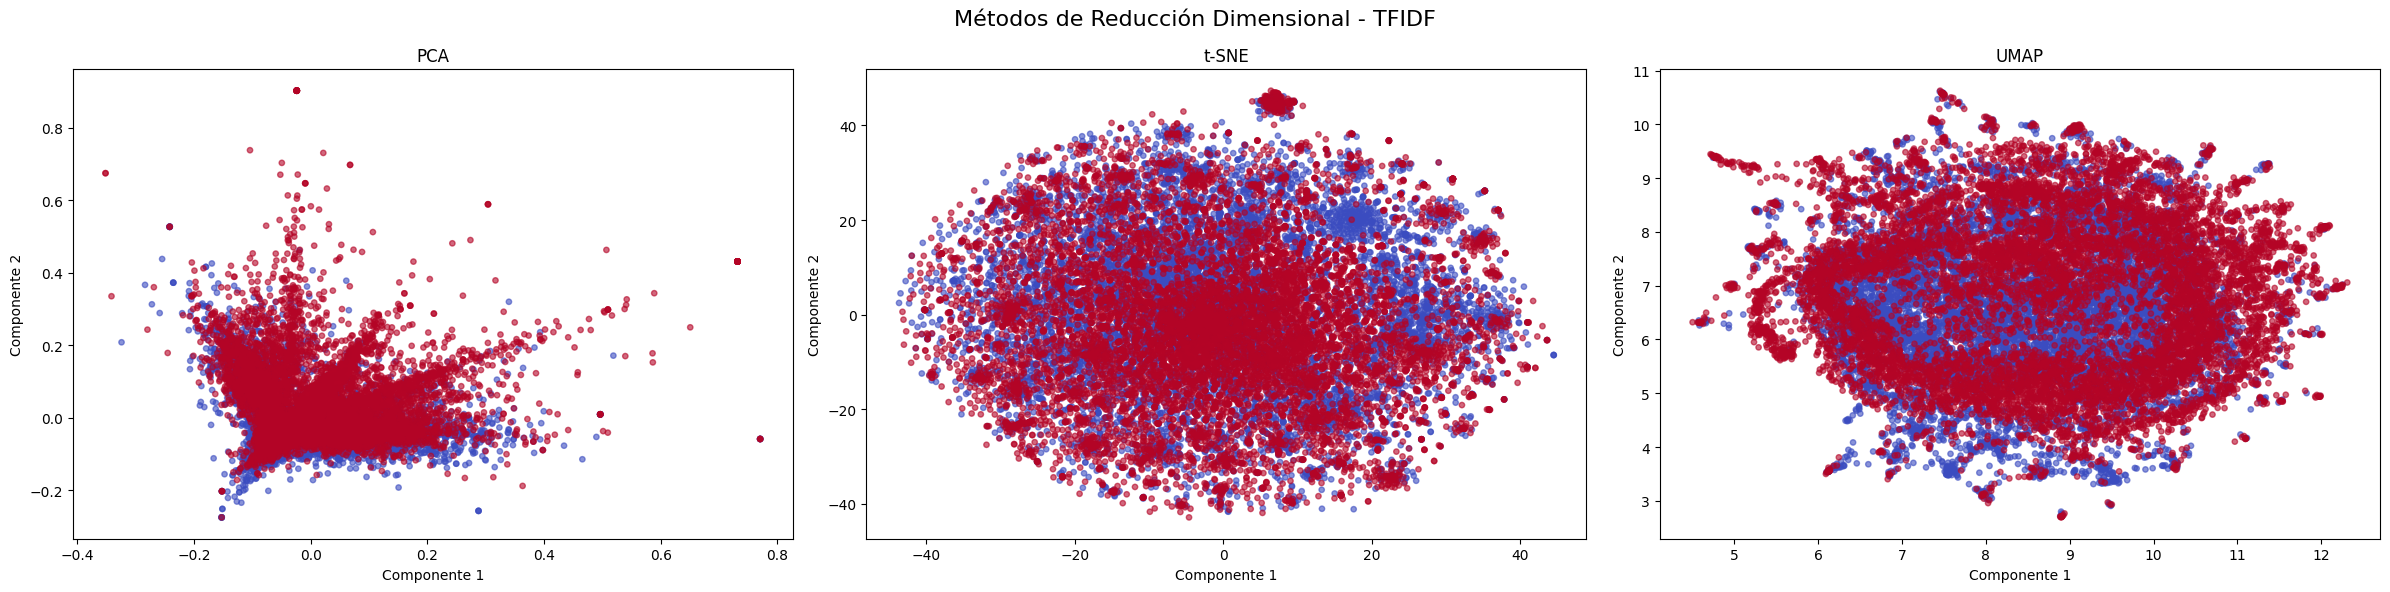


Generando embeddings con SPACY...


/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!



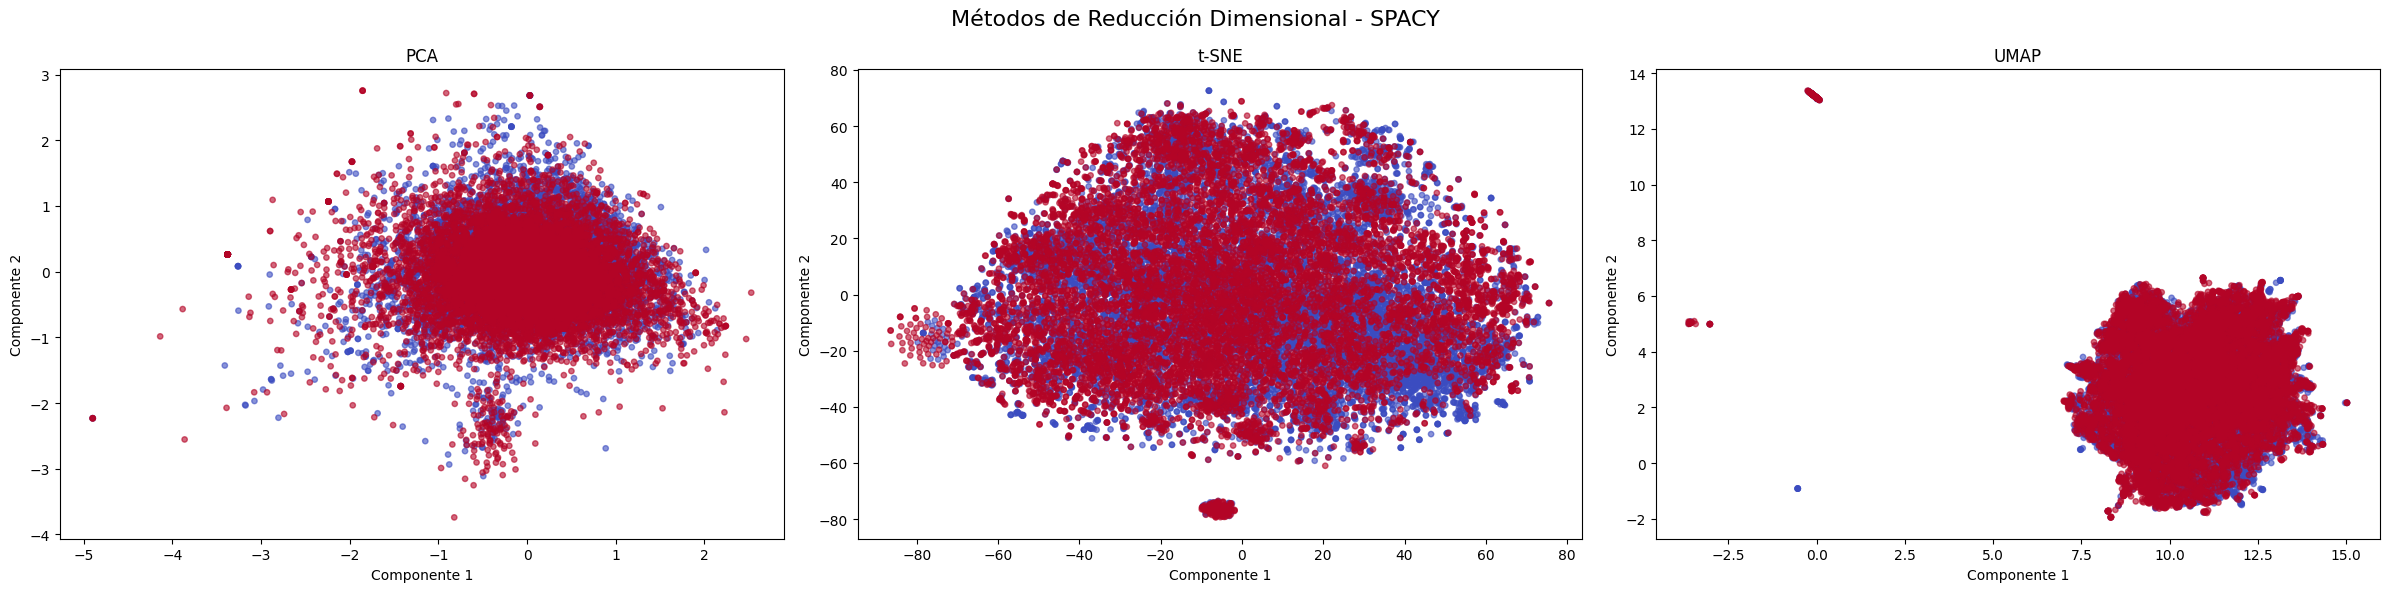


Generando embeddings con TRANSFORMER...


Batches: 100%|██████████| 625/625 [00:26<00:00, 23.46it/s]
/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/home/diegopy/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



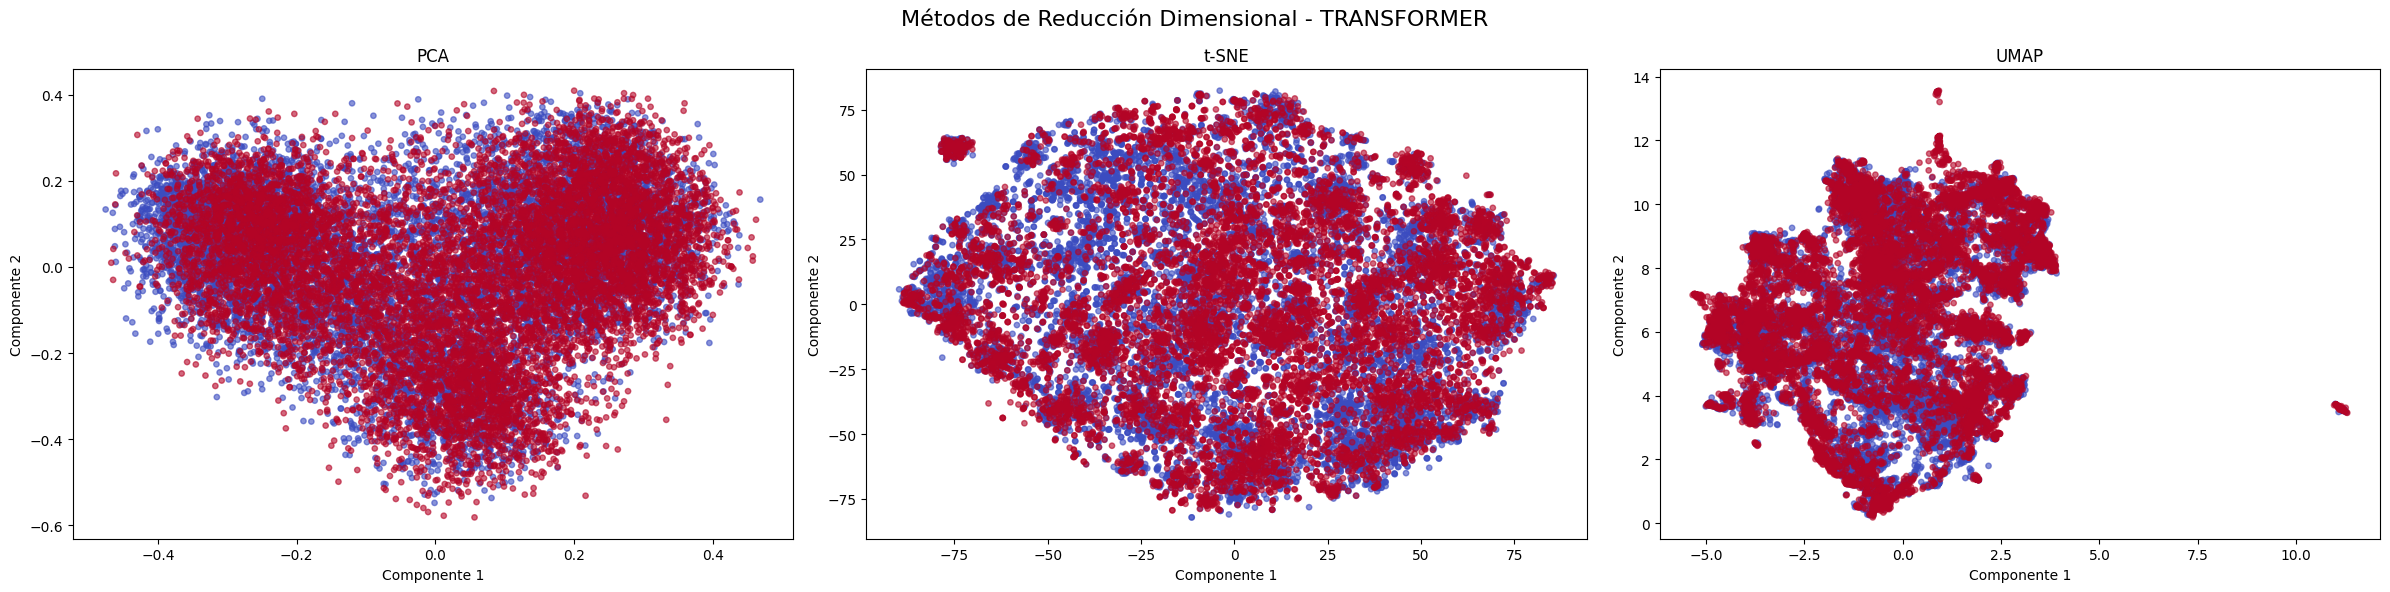

In [14]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import spacy
import pandas as pd

# 1. Cargar datos procesados
train_data = pd.read_parquet("data/processed/train_data.parquet")

# 2. Muestreo estratificado y preparación de datos
def prepare_samples(data):
    sample_data = data.groupby('Sentiment_target', group_keys=False).apply(
        lambda x: x.sample(10000, random_state=42))
    sample_data = sample_data.reset_index(drop=True)
    sample_data = sample_data[sample_data['processed_text'].str.len() > 0].copy()
    return sample_data

# 3. Generación de embeddings (3 métodos)
def generate_embeddings(texts, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=5000)
        return vectorizer.fit_transform(texts).toarray()
    elif method == 'spacy':
        nlp = spacy.load("en_core_web_md")
        return np.array([nlp(text).vector for text in texts])
    elif method == 'transformer':
        from sentence_transformers import SentenceTransformer
        model = SentenceTransformer('all-mpnet-base-v2')
        return model.encode(texts, show_progress_bar=True)

# 4. Función para visualización combinada
def plot_combined_reductions(embeddings, labels, method_name):
    reducers = {
        'PCA': PCA(n_components=2),
        't-SNE': TSNE(n_components=2, perplexity=30, n_iter=1000),
        'UMAP': UMAP(n_components=2, n_neighbors=15)
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.suptitle(f'Métodos de Reducción Dimensional - {method_name}', fontsize=16)
    
    for ax, (name, reducer) in zip(axes, reducers.items()):
        reduced = reducer.fit_transform(embeddings)
        scatter = ax.scatter(reduced[:, 0], reduced[:, 1], c=labels, 
                            cmap='coolwarm', alpha=0.6, s=15)
        ax.set_title(name)
        ax.set_xlabel('Componente 1')
        ax.set_ylabel('Componente 2')
    
    # Añadir barra de color única
    
    plt.tight_layout()
    plt.show()

# 5. Pipeline principal modificado
def embedding_analysis():
    sample_data = prepare_samples(train_data)
    methods = ['tfidf', 'spacy', 'transformer']
    
    for method in methods:
        print(f"\nGenerando embeddings con {method.upper()}...")
        
        texts = sample_data['processed_text'].tolist()
        labels = sample_data['Sentiment_target'].values
        
        embeddings = generate_embeddings(texts, method)
        
        # Validar dimensiones
        assert len(embeddings) == len(labels) == len(texts), "¡Datos desalineados!"
        
        # Visualización combinada 2D
        plot_combined_reductions(embeddings, labels, method.upper())
        
        # Visualización 3D interactiva (opcional)
        # interactive_3d_visualization(embeddings, labels, texts)

# Ejecutar análisis
embedding_analysis()